TASK-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

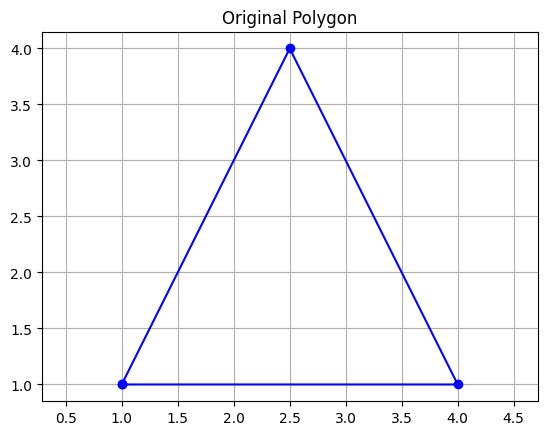

In [ ]:
# Function to plot a 2D object (polygon)
def plot_polygon(points, title, color='blue'):
    points = np.vstack([points, points[0]])  # Close the polygon by connecting the last point to the first
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Define the original polygon (triangle)
polygon = np.array([
    [1, 1],
    [4, 1],
    [2.5, 4]
])

plot_polygon(polygon, "Original Polygon", 'blue')

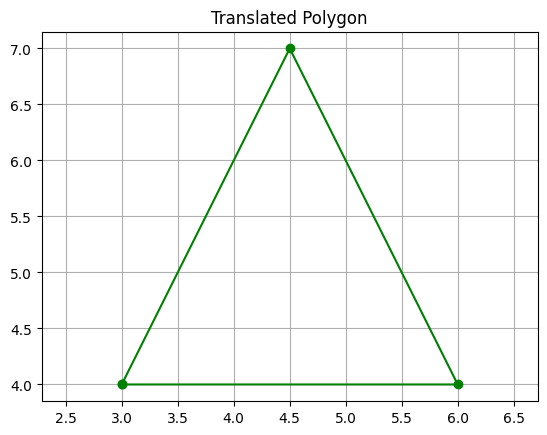

In [ ]:
# 1. Translation
def translate(polygon, tx, ty):
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = T @ homogenous.T
    return transformed[:2].T

translated_polygon = translate(polygon, 2, 3)
plot_polygon(translated_polygon, "Translated Polygon", 'green')

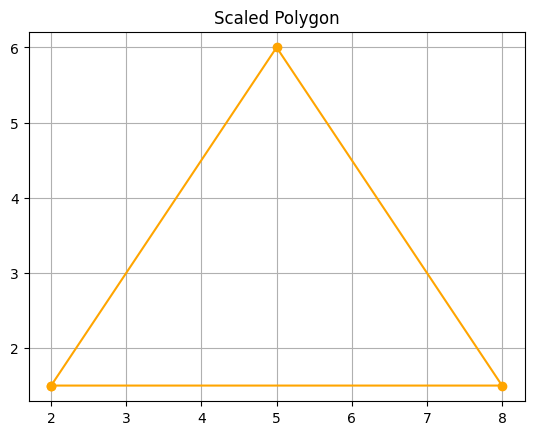

In [ ]:
# 2. Scaling
def scale(polygon, sx, sy):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = S @ homogenous.T
    return transformed[:2].T

scaled_polygon = scale(polygon, 2, 1.5)
plot_polygon(scaled_polygon, "Scaled Polygon", 'orange')

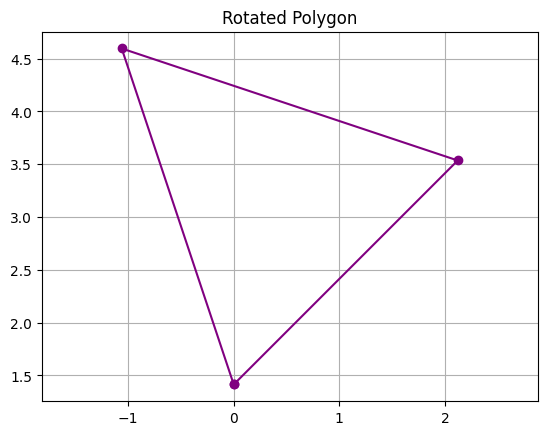

In [ ]:
# 3. Rotation
def rotate(polygon, angle):
    angle_rad = np.radians(angle)
    R = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = R @ homogenous.T
    return transformed[:2].T

rotated_polygon = rotate(polygon, 45)
plot_polygon(rotated_polygon, "Rotated Polygon", 'purple')


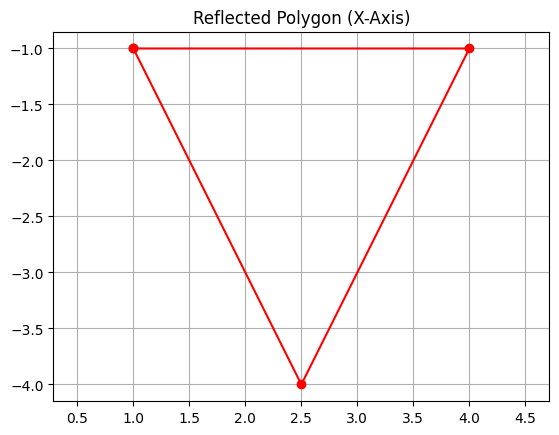

In [ ]:
# 4. Reflection (about x-axis)
def reflect(polygon, axis):
    if axis == 'x':
        R = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        R = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = R @ homogenous.T
    return transformed[:2].T

reflected_polygon = reflect(polygon, 'x')
plot_polygon(reflected_polygon, "Reflected Polygon (X-Axis)", 'red')


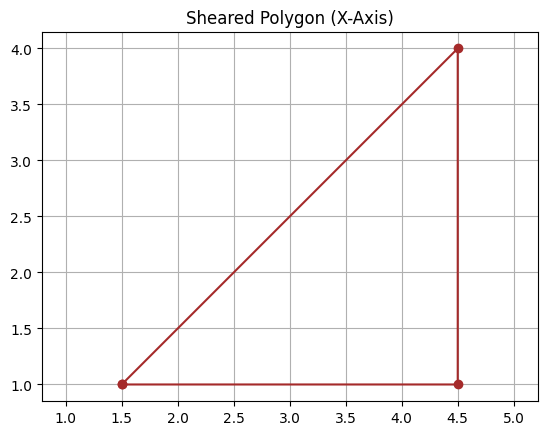

In [ ]:
# 5. Shearing
def shear(polygon, shx, shy):
    Sh = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = Sh @ homogenous.T
    return transformed[:2].T

sheared_polygon = shear(polygon, 0.5, 0)
plot_polygon(sheared_polygon, "Sheared Polygon (X-Axis)", 'brown')


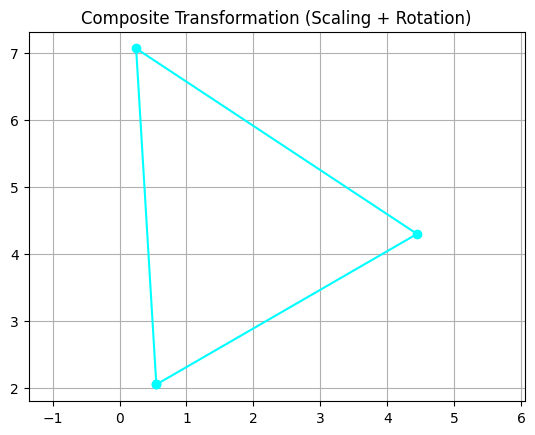

In [ ]:
# 6. Composite Transformation (Scaling + Rotation)
def composite_transform(polygon):
    angle_rad = np.radians(30)
    sx, sy = 1.5, 1.5
    composite_matrix = np.array([
        [sx * np.cos(angle_rad), -sy * np.sin(angle_rad), 0],
        [sx * np.sin(angle_rad), sy * np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    homogenous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = composite_matrix @ homogenous.T
    return transformed[:2].T

composite_polygon = composite_transform(polygon)
plot_polygon(composite_polygon, "Composite Transformation (Scaling + Rotation)", 'cyan')


TASK-2

In [ ]:
import cv2

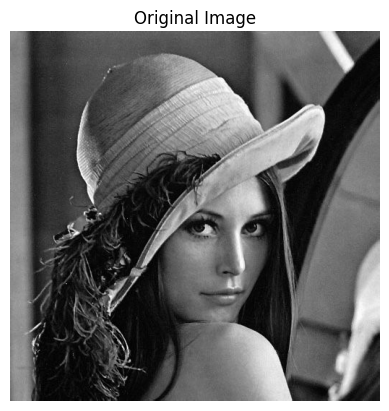

In [ ]:
# 0. Load and display the image.
def display_image(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()
image_path = '/content/drive/My Drive/Picture1.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found. Check the path.")
else:
    display_image(image, "Original Image")

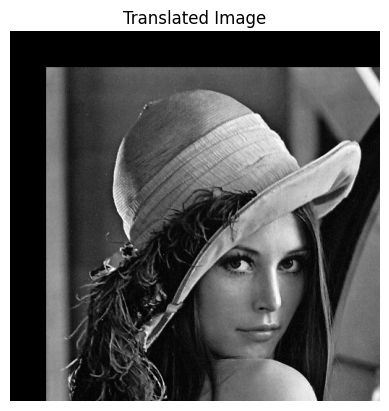

In [ ]:
# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(img, M, (cols, rows))
    return translated

translated_image = translate_image(image, 50, 50)
display_image(translated_image, "Translated Image")

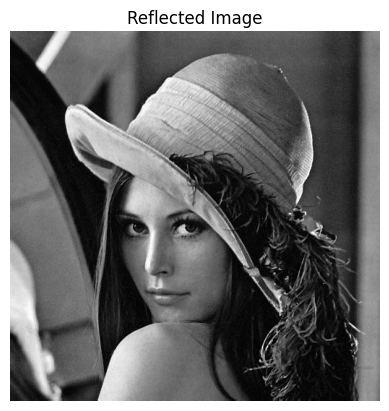

In [ ]:
# 2. Image Reflection
def reflect_image(img):
    reflected = cv2.flip(img, 1)  # Horizontal flip
    return reflected

reflected_image = reflect_image(image)
display_image(reflected_image, "Reflected Image")

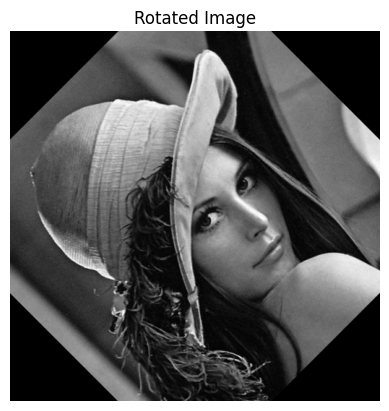

In [ ]:
# 3. Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image")

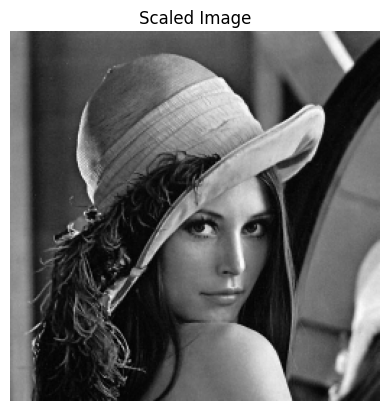

In [ ]:
# 4. Image Scaling
def scale_image(img, fx, fy):
    scaled = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale_image(image, 0.5, 0.5)
display_image(scaled_image, "Scaled Image")


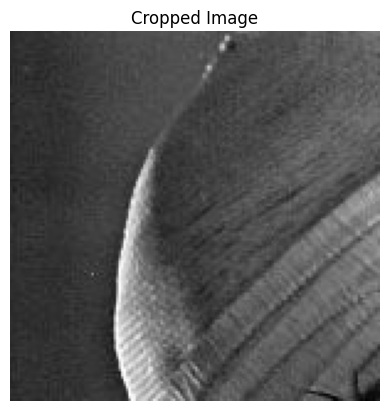

In [ ]:
# 5. Image Cropping
def crop_image(img, x_start, y_start, x_end, y_end):
    cropped = img[y_start:y_end, x_start:x_end]
    return cropped

cropped_image = crop_image(image, 50, 50, 200, 200)
display_image(cropped_image, "Cropped Image")

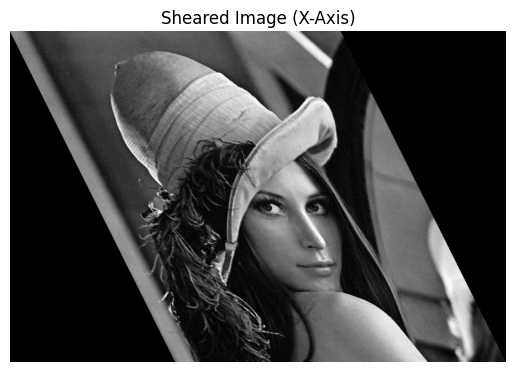

In [ ]:
# 6. Image Shearing in x-axis
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(img, M, (cols + int(shear_factor * rows), rows))
    return sheared

sheared_x_image = shear_image_x(image, 0.5)
display_image(sheared_x_image, "Sheared Image (X-Axis)")

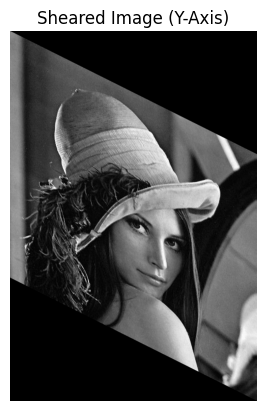

In [ ]:
# 7. Image Shearing in y-axis
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared = cv2.warpAffine(img, M, (cols, rows + int(shear_factor * cols)))
    return sheared

sheared_y_image = shear_image_y(image, 0.5)
display_image(sheared_y_image, "Sheared Image (Y-Axis)")